<a href="https://colab.research.google.com/github/Lily1619/Fire-Rescue-Robot/blob/main/ECG_PROCESSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as sg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
np.load("/content/drive/MyDrive/datasets/dsp_datasets/arrhythmia_preprocessed/100_1.npy")

array([-0.03720375, -0.04355592, -0.03254148, ...,  0.00841994,
        0.00907958, -0.00280602])

In [ ]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.5 MB/s eta 0:00:00


In [ ]:
import wfdb

In [ ]:
direct = "/content/drive/MyDrive/datasets/dsp_datasets/arrhythmia/100"
record = wfdb.rdrecord(direct)

In [ ]:
direct_2 = "/content/drive/MyDrive/datasets/dsp_datasets/atrial/04043"
record_2 = wfdb.rdrecord(direct_2)

In [ ]:
direct_3 = "/content/drive/MyDrive/datasets/dsp_datasets/supra/800"
record_3 = wfdb.rdrecord(direct_3)

In [ ]:
sampling = record_3.fs
sampling

128

In [ ]:
signal = record.p_signal
signal = signal[:,0]

In [ ]:
sampling = record.fs
sampling

360

In [ ]:
sampling = record_2.fs
sampling

250

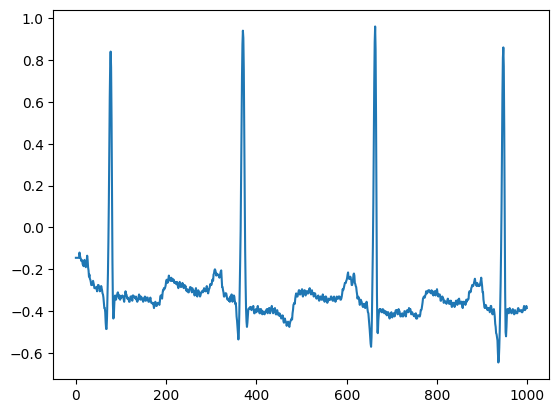

In [ ]:
plt.plot(signal[:1000])

In [ ]:
direct_1 = "/content/drive/MyDrive/datasets/dsp_datasets"

In [ ]:
classes = os.listdir(direct_1)
print(classes)

['supra', 'arrhythmia', 'atrial', 'arrhythmia_preprocessed', 'supra_preprocessed', 'atrial_preprocessed']


In [ ]:

def resample_signal(signal, original_sampling_rate, target_sampling_rate):
    resampling_factor = target_sampling_rate / original_sampling_rate
    num_samples_resampled = int(len(signal) * resampling_factor)
    resampled_signal = sg.resample(signal, num_samples_resampled)
    return resampled_signal

In [ ]:
def preprocessing_arrh(input_signal, record):
    # Split the input signal into blocks
    block_size = 1280
    num_blocks = len(input_signal) // block_size

    processed_data = []

    for i in range(num_blocks):
        block_start = i * block_size
        block_end = (i + 1) * block_size
        block = input_signal[block_start:block_end]

        # Mean removal
        block = block - np.mean(block)

        # Low-pass filtering
        block = sg.filtfilt(*sg.butter(4, 0.9, btype='low'), block)

        # High-pass filtering (baseline wander removal)
        block = sg.filtfilt(*sg.butter(4, 0.0039, btype='high'), block)

        # Normalization
        block = block / np.max(np.abs(block))

        np.save(f"/content/drive/MyDrive/datasets/dsp_datasets/arrhythmia_preprocessed/{record}_{i}.npy", block)



In [ ]:
# Path to the directory containing .dat files
dat_dir_arrhythmia = "/content/drive/MyDrive/datasets/dsp_datasets/arrhythmia/"
dat_dir_supra = "/content/drive/MyDrive/datasets/dsp_datasets/supra/"
dat_dir_atrial = "/content/drive/MyDrive/datasets/dsp_datasets/atrial/"

# Path to the directory to store preprocessed data
output_dir_arrhythmia = "/content/drive/MyDrive/datasets/dsp_datasets/arrhythmia_preprocessed/"
original_sampling_rate_arrhythmia = 360  # Adjust as needed
output_dir_supra = "/content/drive/MyDrive/datasets/dsp_datasets/supra_preprocessed/"
original_sampling_rate_supra = 128  # Adjust as needed
output_dir_atrial = "/content/drive/MyDrive/datasets/dsp_datasets/atrial_preprocessed/"
original_sampling_rate_atrial = 250  # Adjust as needed
# Target sampling rate after resampling
target_sampling_rate = 128  # Adjust as needed

In [ ]:
# Iterate over each .dat file in the directory
a=0
for filename in os.listdir(dat_dir_arrhythmia):
    if filename.endswith(".dat"):
        filepath = os.path.join(dat_dir_arrhythmia, filename)

        # Load the signal using wfdb
        record = wfdb.rdrecord(filepath[:-4])
        signals = record.p_signal  # Extract the signals
        signal = signals[:,0]

        # Original sampling rate
        original_sampling_rate = record.fs

        resampled_signal = resample_signal(signal, original_sampling_rate, target_sampling_rate)

        # Preprocess the resampled signal
        preprocessed_data = preprocessing_arrh(resampled_signal, filename[:3])
        print(a)
        a+=1

In [ ]:
def preprocessing_supra(input_signal, record):
    # Split the input signal into blocks
    block_size = 1280
    num_blocks = len(input_signal) // block_size

    processed_data = []

    for i in range(num_blocks):
        block_start = i * block_size
        block_end = (i + 1) * block_size
        block = input_signal[block_start:block_end]

        # Mean removal
        block = block - np.mean(block)

        # Low-pass filtering
        block = sg.filtfilt(*sg.butter(4, 0.9, btype='low'), block)

        # High-pass filtering (baseline wander removal)
        block = sg.filtfilt(*sg.butter(4, 0.0039, btype='high'), block)

        # Normalization
        block = block / np.max(np.abs(block))

        np.save(f"/content/drive/MyDrive/datasets/dsp_datasets/supra_preprocessed/{record}_{i}.npy", block)



In [ ]:
# Iterate over each .dat file in the directory
b=0
for filename in os.listdir(dat_dir_supra):
    if filename.endswith(".dat"):
        filepath = os.path.join(dat_dir_supra, filename)

        # Load the signal using wfdb
        record = wfdb.rdrecord(filepath[:-4])
        signals = record.p_signal  # Extract the signals
        signal = signals[:,0]

        # Original sampling rate
        original_sampling_rate = record.fs

        resampled_signal = resample_signal(signal, original_sampling_rate, target_sampling_rate)

        # Preprocess the resampled signal
        preprocessed_data = preprocessing_supra(resampled_signal, filename[:3])
        print(b)
        b+=1

In [ ]:
def preprocessing(input_signal, record):
    # Split the input signal into blocks
    block_size = 1280
    num_blocks = len(input_signal) // block_size

    processed_data_atrial = []

    for i in range(num_blocks):
        block_start = i * block_size
        block_end = (i + 1) * block_size
        block = input_signal[block_start:block_end]

        # Mean removal
        block = block - np.mean(block)

        # Low-pass filtering
        block = sg.filtfilt(*sg.butter(4, 0.9, btype='low'), block)

        # High-pass filtering (baseline wander removal)
        block = sg.filtfilt(*sg.butter(4, 0.0039, btype='high'), block)

        # Normalization
        block = block / np.max(np.abs(block))

        np.save(f"/content/drive/MyDrive/datasets/dsp_datasets/atrial_preprocessed/{record}_{i}.npy", block)



In [ ]:
# Iterate over each .dat file in the directory
c=0
for filename in os.listdir(dat_dir_atrial):
    if filename.endswith(".dat"):
        filepath = os.path.join(dat_dir_atrial, filename)

        # Load the signal using wfdb
        record = wfdb.rdrecord(filepath[:-4])
        signals = record.p_signal  # Extract the signals
        signal = signals[:,0]

        # Original sampling rate
        original_sampling_rate = record.fs

        resampled_signal = resample_signal(signal, original_sampling_rate, target_sampling_rate)

        # Preprocess the resampled signal
        preprocessed_data = preprocessing(resampled_signal, filename[:5])
        print(c)
        c+=1

In [ ]:
np.load("/content/drive/MyDrive/datasets/dsp_datasets/supra_preprocessed/826_0.npy").shape

(1280,)

In [9]:
import os
import numpy as np

# Define your classes list and dataset directory
classes_list = ['arrhythmia_preprocessed', 'atrial_preprocessed', 'supra_preprocessed']  # Replace with your class names
datasetDir = "/content/drive/MyDrive/datasets/dsp_datasets"  # Replace with your dataset directory

def create_dataset1():
    features = []
    labels = []

    # Define the target number of files to load for each class
    target_num_files_per_class = 1500

    total_files_loaded = 0

    for class_index, class_name in enumerate(classes_list):
        class_files_list = os.listdir(os.path.join(datasetDir, class_name))
        num_files_to_load = min(target_num_files_per_class, len(class_files_list))

        print("Loading files for class:", class_name)
        print("Total files available:", len(class_files_list))
        print("Target files to load:", num_files_to_load)

        for file_index, file_name in enumerate(class_files_list[:num_files_to_load], start=1):
            signal_file_path = os.path.join(datasetDir, class_name, file_name)
            array_data = np.load(signal_file_path)

            features.append(array_data)
            labels.append(class_index)

            total_files_loaded += 1
            print("Files loaded:", total_files_loaded, "/", 4499)

            if total_files_loaded >= 4499:
                break  # Stop loading files once 4499 files are loaded

        if total_files_loaded >= 4499:
            break  # Stop loading files from other classes once 4499 files are loaded

    features = np.asarray(features)
    labels = np.asarray(labels)

    return features, labels

# Create the dataset
features, labels = create_dataset1()

# Now you have your features and labels ready for further processing or modeling
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)


Loading files for class: arrhythmia_preprocessed
Total files available: 8561
Target files to load: 1500
Files loaded: 1 / 4499
Files loaded: 2 / 4499
Files loaded: 3 / 4499
Files loaded: 4 / 4499
Files loaded: 5 / 4499
Files loaded: 6 / 4499
Files loaded: 7 / 4499
Files loaded: 8 / 4499
Files loaded: 9 / 4499
Files loaded: 10 / 4499
Files loaded: 11 / 4499
Files loaded: 12 / 4499
Files loaded: 13 / 4499
Files loaded: 14 / 4499
Files loaded: 15 / 4499
Files loaded: 16 / 4499
Files loaded: 17 / 4499
Files loaded: 18 / 4499
Files loaded: 19 / 4499
Files loaded: 20 / 4499
Files loaded: 21 / 4499
Files loaded: 22 / 4499
Files loaded: 23 / 4499
Files loaded: 24 / 4499
Files loaded: 25 / 4499
Files loaded: 26 / 4499
Files loaded: 27 / 4499
Files loaded: 28 / 4499
Files loaded: 29 / 4499
Files loaded: 30 / 4499
Files loaded: 31 / 4499
Files loaded: 32 / 4499
Files loaded: 33 / 4499
Files loaded: 34 / 4499
Files loaded: 35 / 4499
Files loaded: 36 / 4499
Files loaded: 37 / 4499
Files loaded: 38 

In [10]:
features.shape

(4499, 1280)

In [11]:
# Reshape features array to add a dummy time dimension
num_samples, num_features = features.shape
num_timesteps = 1  # Add a dummy time dimension

features_reshaped = features.reshape(num_samples, num_timesteps, num_features)

In [12]:
# Print the new shape
print("Features reshaped:", features_reshaped.shape)

Features reshaped: (4499, 1, 1280)


In [13]:
# Define input shape and number of classes
input_shape = features_reshaped.shape[1:]  # Shape is (1, 1280)
num_classes = len(classes_list)

In [21]:
# Define the input shape
input_shape = (1, 1280)

# Define the number of classes
num_classes = 10

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, Flatten, Dense
model = Sequential([
    Conv1D(64, 3, input_shape=input_shape, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv1D(128, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Flatten(),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dense(num_classes, activation='softmax')
])

In [23]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 1, 64)             245824    
                                                                 
 batch_normalization_3 (Bat  (None, 1, 64)             256       
 chNormalization)                                                
                                                                 
 activation_3 (Activation)   (None, 1, 64)             0         
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 128)            24704     
                                                                 
 batch_normalization_4 (Bat  (None, 1, 128)            512       
 chNormalization)                                                
                                                                 
 activation_4 (Activation)   (None, 1, 128)           

In [26]:
# Print the number of arguments expected by the compute_class_weight function
print(compute_class_weight.__code__.co_argcount)

# Print the arguments passed to the compute_class_weight function
print(compute_class_weight.__code__.co_varnames)

1
('class_weight', 'classes', 'y', 'LabelEncoder', 'weight', 'le', 'y_ind', 'recip_freq', 'unweighted_classes', 'i', 'c', 'n_weighted_classes')


In [32]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_reshaped, labels, test_size=0.2, random_state=42)


In [34]:
# Import necessary libraries
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(X_train, y_train, epochs=4, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/4
113/113 [==============================] - 1s 8ms/step - loss: 0.1148 - accuracy: 0.9642 - val_loss: 1.3275 - val_accuracy: 0.6044
Epoch 2/4
113/113 [==============================] - 1s 8ms/step - loss: 0.1333 - accuracy: 0.9517 - val_loss: 1.4358 - val_accuracy: 0.6044
Epoch 3/4
113/113 [==============================] - 2s 14ms/step - loss: 0.1259 - accuracy: 0.9564 - val_loss: 1.4200 - val_accuracy: 0.6033
Epoch 4/4
113/113 [==============================] - 2s 13ms/step - loss: 0.1190 - accuracy: 0.9586 - val_loss: 1.4331 - val_accuracy: 0.5989


In [35]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

29/29 [==============================] - 0s 4ms/step - loss: 1.4331 - accuracy: 0.5989
Test Loss: 1.4331258535385132
Test Accuracy: 0.5988888740539551


In [37]:
# Save the model to H5 file
model.save("your_model.keras")

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import load_model

In [40]:
# Load the model from the saved file
loaded_model = load_model("your_model.h5")

In [43]:
# Print the type of y_test
print(type(y_test))

# Print the type of y_pred
print(type(y_pred))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [51]:
print(type(y_test))
print(type(y_pred))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [52]:
if type(y_test) == np.ndarray:
    y_pred = np.argmax(y_pred, axis=1)

In [54]:
# Convert one-hot encoded labels to integers
y_test_int = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred)


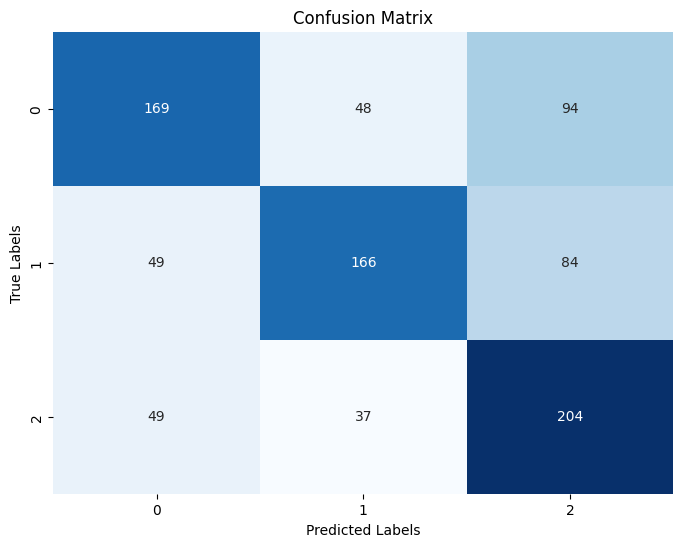

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

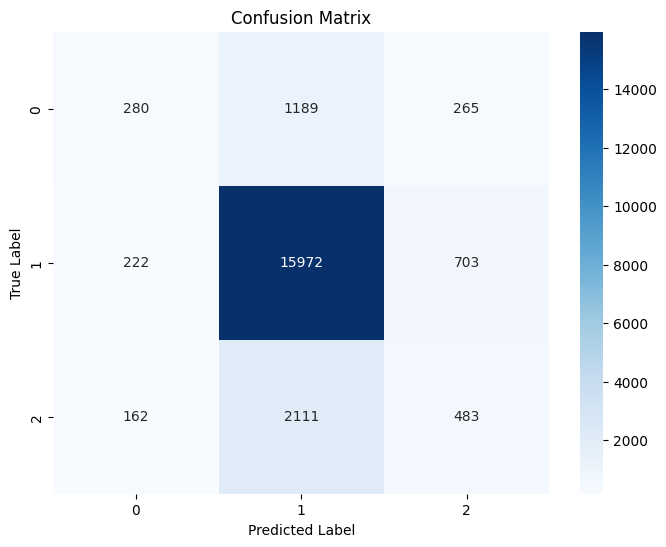

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_metrics(y_true, y_pred):
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plot_metrics(y_val, y_pred)